# What are the most important factors for predicting minutes per game for top NBA players.

In [23]:
# importing libraries for project
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Collecting Data

In [24]:



# basing off 10 players
base_url = "https://www.basketball-reference.com/players/"
my_players = ['t/tatumja01.html', 'j/jamesle01.html', 'p/paulch01.html' , 'd/duranke01.html', 'h/hardeja01.html' , 'h/howardw01.html', 'c/curryst01.html', 'a/aldrila01.html' , 'a/anthoca01.html', 'w/westbru01.html']

# main storage for data I will append to 
data = []


# This is for headers
# Just using first player as headers will be the same for all

temp_url = base_url + my_players[0]
page = requests.get(temp_url)
soup = bs(page.content, 'html.parser')
first_table = soup.select('table')[0]
rows = first_table.select('tr')

  # watch out for season not having a value in my data 
headers  = list(map(lambda x: x.text, rows[0].select('th')))
actual_headers = headers[1:]
# print(headers)


# looping through each player to scrape my data

for playerLink in my_players:

    newURL = base_url + playerLink
    page = requests.get(newURL)


    soup = bs(page.content, 'html.parser')

    first_table = soup.select('table')[0]
    rows = first_table.select('tr')
    # have to start at 1 to not include headers and end at len-1  to not include career averages

    for i in range(1,len(rows) - 1):
        # table can get messed up based on their career this line will stop that
        if rows[i].select('td')[0].text == '':
            break
        # adding rows to data
        data.append(list(map(lambda x: x.text, rows[i].select('td'))))









# Cleaning Data

In [25]:
# initializing dataframe
players_df = pd.DataFrame(data=data , columns=actual_headers)
players_df.head()


players_df.to_csv("players_not_cleaned.csv")
players_df = pd.read_csv(r'players_not_cleaned.csv')

# starting cleaning process


players_df.drop(['Unnamed: 0'], axis=1, inplace=True)



In [26]:

# getting rid of all rows that have nan values to not mess up later calculations
players_df = players_df.dropna()


# getting rid of columns that do not matter

players_df.drop(["Tm", "Lg", 'Pos'], axis=1, inplace=True)
players_df.rename(columns = {'Pos':'Position'}, inplace = True)
players_df.head()

players_df.to_csv("players_dataset_cleaned_version.csv")





# Data Visualization

In [27]:
# dropping unneccesary column

players_df = pd.read_csv('players_dataset_cleaned_version.csv')
players_df.drop(['Unnamed: 0'], axis = 1, inplace=True)
players_df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,27.555556,65.030864,61.024691,34.445062,7.774074,16.277778,0.482599,1.579012,4.305556,0.329926,...,0.802951,1.398148,5.590741,6.983333,5.392593,1.285185,0.741358,2.888272,2.430247,22.082716
std,5.036513,19.345317,24.114878,4.317566,1.972090,4.221551,0.054261,1.207041,3.050471,0.117216,...,0.105808,0.943330,1.843801,2.446426,3.202262,0.517426,0.551862,1.005351,0.507960,5.924259
min,19.000000,5.000000,0.000000,16.200000,2.200000,3.700000,0.385000,0.000000,0.000000,0.000000,...,0.489000,0.300000,2.600000,3.100000,0.400000,0.300000,0.000000,0.700000,1.400000,6.200000
25%,23.000000,60.000000,55.000000,33.100000,6.300000,13.400000,0.444000,0.800000,2.300000,0.310000,...,0.757500,0.700000,4.125000,5.100000,2.400000,0.900000,0.300000,2.300000,2.100000,17.650000
50%,27.000000,72.000000,71.000000,35.450000,8.000000,17.150000,0.476000,1.500000,4.100000,0.353500,...,0.836000,1.000000,5.300000,6.750000,5.550000,1.200000,0.600000,3.000000,2.400000,22.800000
75%,32.000000,79.000000,78.000000,37.000000,9.400000,19.400000,0.508750,2.200000,6.100000,0.385750,...,0.873000,1.875000,6.700000,8.000000,7.775000,1.600000,1.000000,3.500000,2.800000,26.650000
max,38.000000,82.000000,82.000000,42.500000,11.400000,24.500000,0.729000,5.300000,13.200000,0.800000,...,1.000000,4.300000,10.800000,14.500000,11.700000,2.800000,2.900000,5.700000,3.800000,36.100000


<AxesSubplot: >

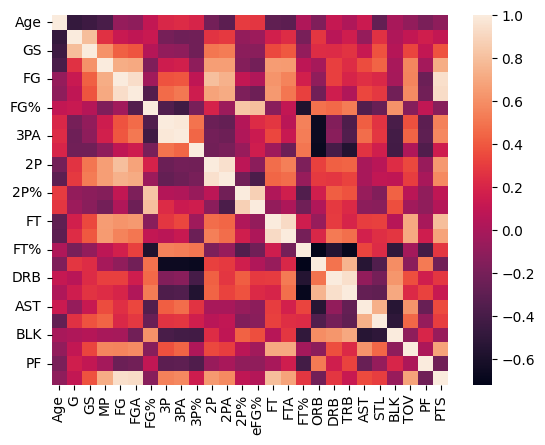

In [28]:

sns.heatmap(players_df.corr())

# For the heatmap it is important to look at the MP played row (below GS). From that we can see some of the more important factors are FG and FGA as well as 2PA and FT. 

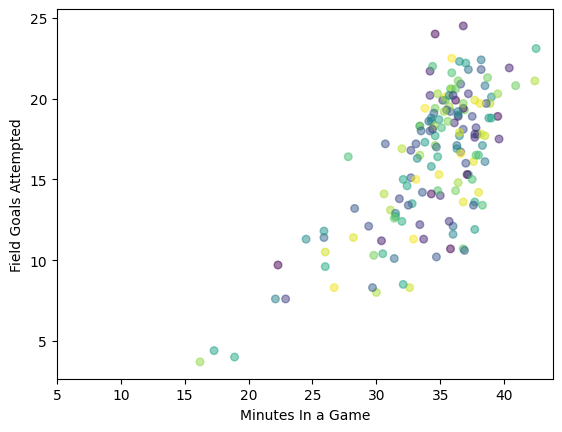

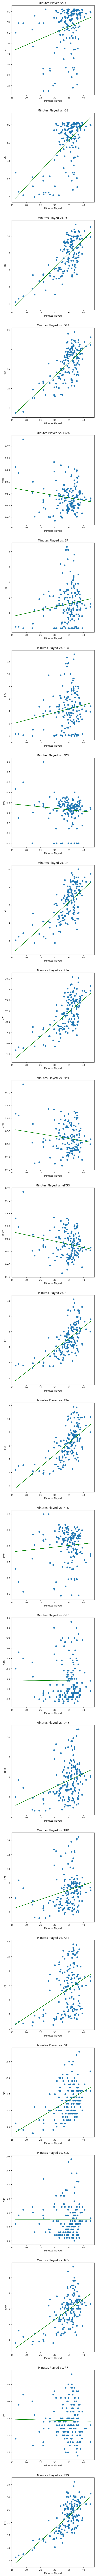

In [29]:





# Example scatterplot


Minutes = players_df['MP']
someFGA = players_df['FGA']

# N is number of rows here
N = 162
colors = np.random.rand(N)
area = 30
plt.scatter(Minutes,someFGA, s=area, c = colors, alpha= 0.5)
plt.xticks([5,10,15,20,25,30,35,40])
plt.xlabel("Minutes In a Game")
plt.ylabel("Field Goals Attempted")
plt.show()


df_float = players_df.select_dtypes('float').copy()
minutesPlayed = df_float['MP'].copy()

# dont want to compare to itself
df_float.drop(['MP'], axis = 1, inplace = True)

figure, axis = plt.subplots(24)
figure.set_figheight(200)
# to loop through cols of dataframe
cols = df_float.columns.tolist()
for i in range(0, 24):
    axis[i].scatter(minutesPlayed, df_float[cols[i]])
    axis[i].set_title(f"Minutes Played vs. {cols[i]}")
    # labels 
    axis[i].set_xlabel("Minutes Played")
    axis[i].set_ylabel(cols[i])
    axis[i].autoscale_view
    m, b = np.polyfit(minutesPlayed, df_float[cols[i]], 1)
    axis[i].plot(minutesPlayed, m*minutesPlayed + b, color='green')



# Data Modeling

   Age     G    GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...    FT%  ORB  \
0   19  80.0  80.0  30.5  5.0  10.4  0.475  1.3  3.0  0.434  ...  0.826  0.6   
1   20  79.0  79.0  31.1  5.9  13.1  0.450  1.5  3.9  0.373  ...  0.855  0.9   
2   21  66.0  66.0  34.3  8.4  18.6  0.450  2.9  7.1  0.403  ...  0.812  1.0   
3   22  64.0  64.0  35.8  9.5  20.6  0.459  2.9  7.6  0.386  ...  0.868  0.8   
4   23  76.0  76.0  35.9  9.3  20.6  0.453  3.0  8.6  0.353  ...  0.853  1.1   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  4.4  5.0  1.6  1.0  0.7  1.4  2.1  13.9  
1  5.2  6.0  2.1  1.1  0.7  1.5  2.1  15.7  
2  6.0  7.0  3.0  1.4  0.9  2.3  2.1  23.4  
3  6.6  7.4  4.3  1.2  0.5  2.7  1.9  26.4  
4  6.9  8.0  4.4  1.0  0.6  2.9  2.3  26.9  

[5 rows x 26 columns]


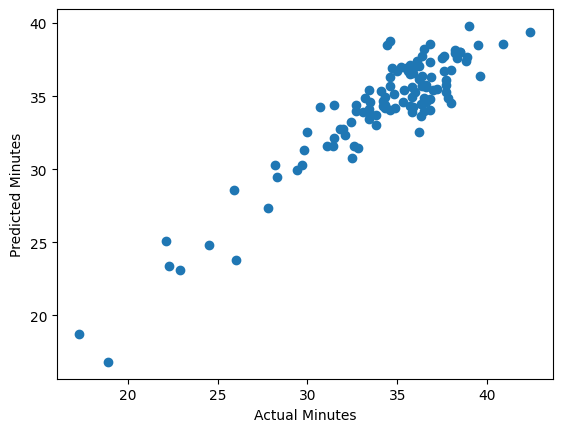

0.8564044293956635


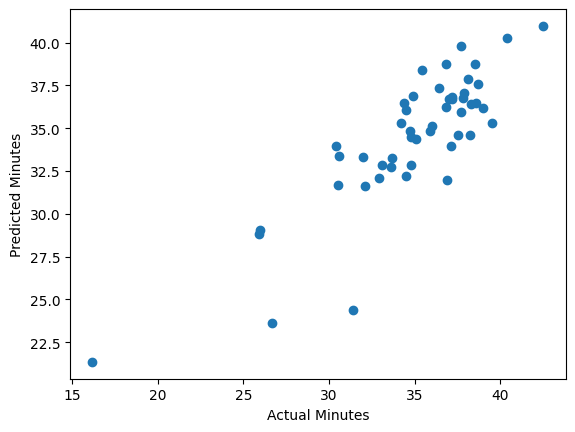

0.7171671639695507


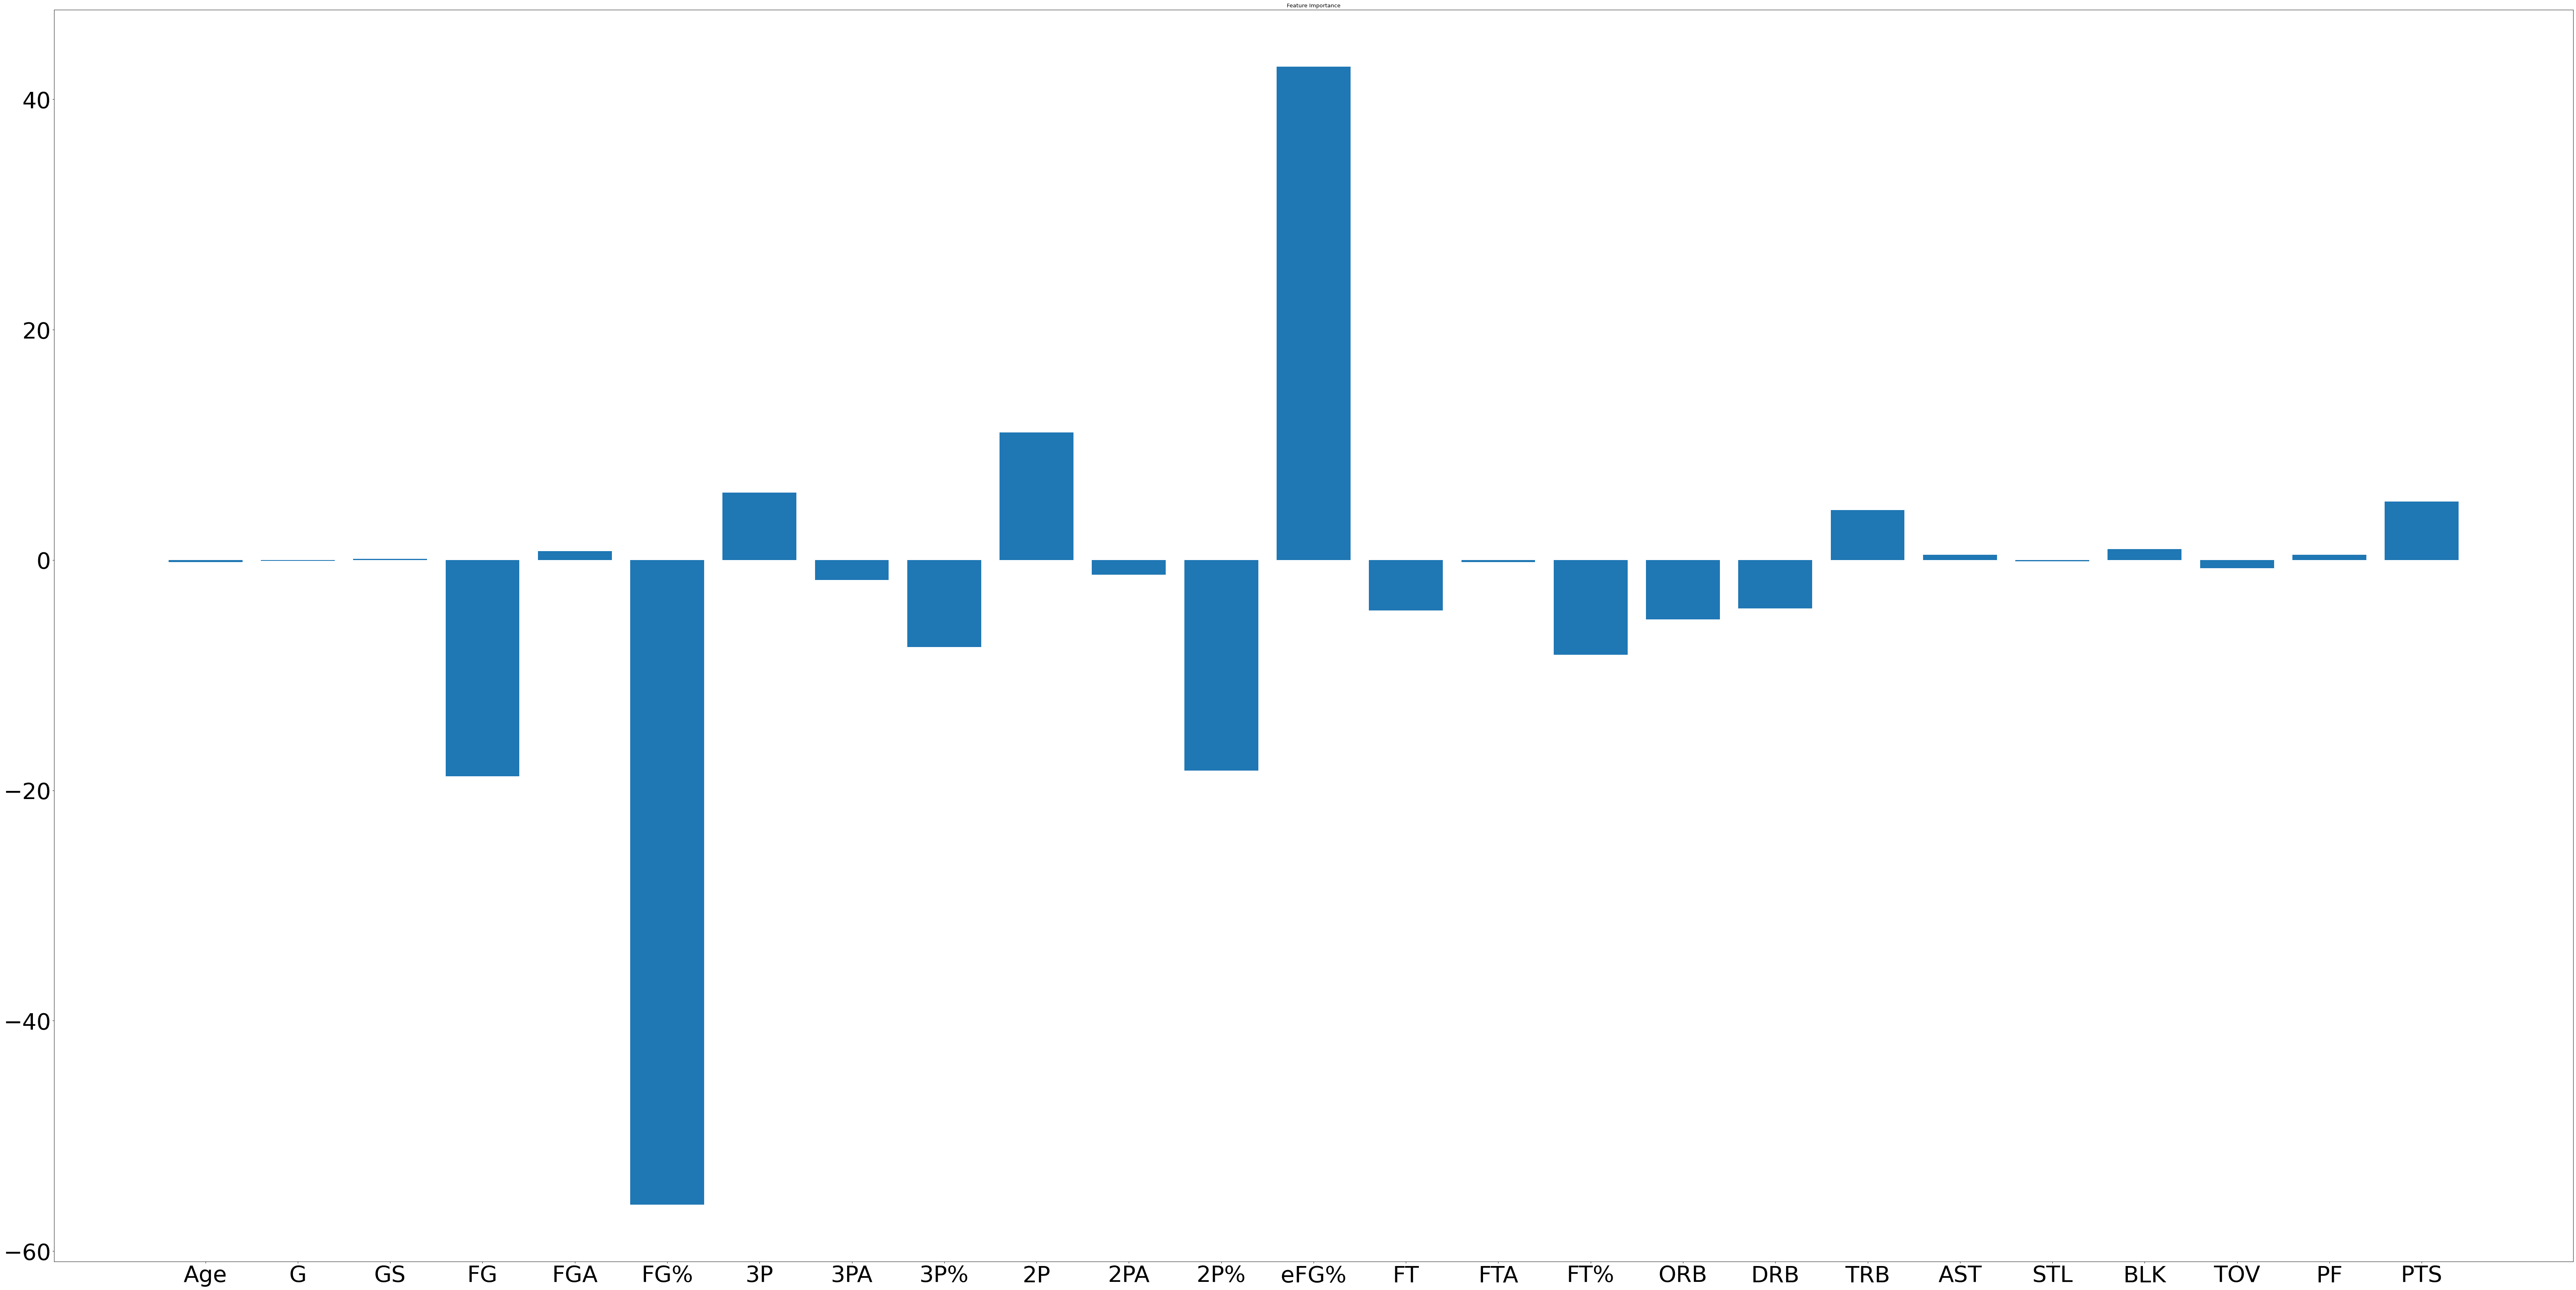

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure

df = players_df.copy()
print(df.head())

players_df.dtypes

# setting X and y variables for modeling
X = df.drop(columns = 'MP')

# Multiple variable linear regression

y = df['MP']


# standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

# splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_stand,y,test_size=0.3 )

lr = LinearRegression()

# fitting model
lr.fit(X_train, y_train)

c = lr.intercept_
m = lr.coef_

y_pred_train = lr.predict(X_train)

plt.scatter(y_train, y_pred_train)

plt.xlabel("Actual Minutes")
plt.ylabel("Predicted Minutes")
plt.show()

# R2 closer to 1 is better
print(r2_score(y_train, y_pred_train))



y_pred_test = lr.predict(X_test)

y_pred_train = lr.predict(X_train)

plt.scatter(y_test, y_pred_test)

plt.xlabel("Actual Minutes")
plt.ylabel("Predicted Minutes")
plt.show()

print(r2_score(y_test, y_pred_test))

# The fact that r2 score went down may mean model is not that good but could just be small test set
# Main issue is likely limited data though



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 )

lr = LinearRegression()

lr.fit(X_train, y_train)

c = lr.intercept_
m = lr.coef_






figure(figsize=(100, 50), dpi=80)
feature_importance = lr.coef_
X = df.drop(columns = 'Age')
X = df.drop(columns = 'MP')
feature_names = X.columns


# feature importance graph

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()


# It can be see that some factors are much more important than other for predicting MP. In the scatterplot the graphs with a much better correlation are stronger at predicting MP. 
# The heatmap also does a good show picturing this in the MP row.

# In the future it would be better to study this phenomenon on a much larger dataset. I think the limited player data really threw off the model as it was tested on so little. 
# Some of the most important factors for predicting MP are FGA PTS and FT. 
# Some factors I learned are unimportant are blocks and games 




